In [1]:
library(rethinking)

Loading required package: rstan
Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
Loading required package: dagitty
rethinking (Version 1.93)

Attaching package: ‘rethinking’

The following object is masked from ‘package:stats’:

    rstudent



In [2]:
# 1

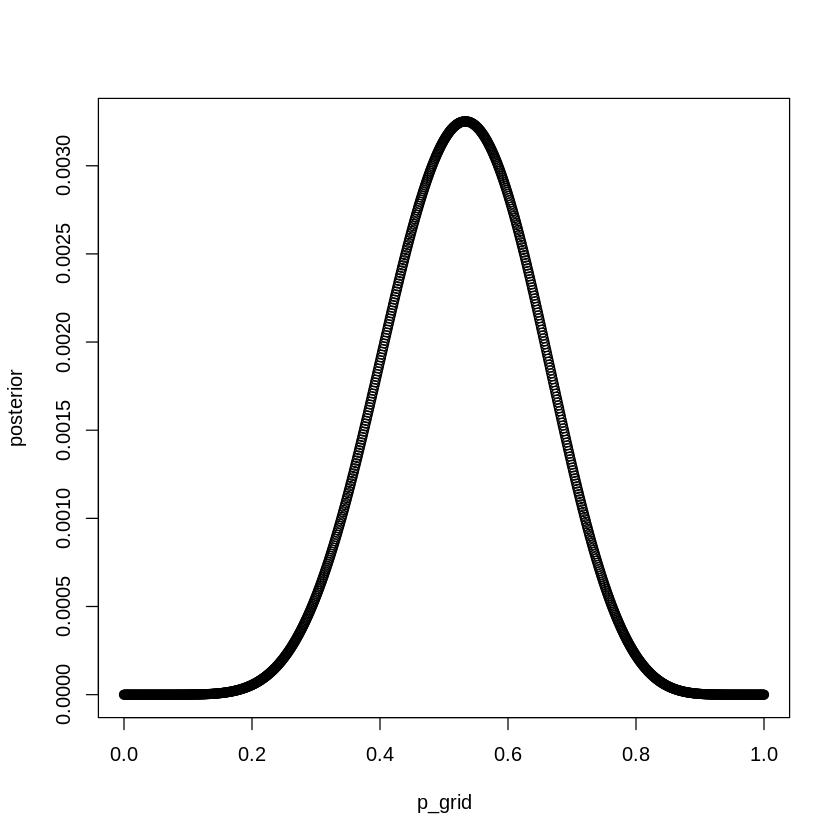

In [3]:
n_samples = 1000
p_grid <- seq(0, 1, length.out = n_samples)
prior <- rep(1, n_samples)
likelihood <- dbinom(8, 15, p=p_grid)

unstd.posterior <- likelihood * prior
posterior <- unstd.posterior / sum(unstd.posterior)

plot(p_grid, posterior, type='b')

In [4]:
samples.1 <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
mean(samples.1); mean(samples.1) + qnorm(.01) * sd(samples.1); mean(samples.1) + qnorm(.99) * sd(samples.1)

[1] 0.529933

[1] 0.2578203

[1] 0.8020458

# 2 

In [58]:
n_samples = 100
p_grid <- seq(0, 1, length.out = n_samples)
prior <- c(rep(0, n_samples/2), rep(1, n_samples/2))
likelihood <- dbinom(8, 15, p=p_grid)

unstd.posterior <- likelihood * prior
posterior <- unstd.posterior / sum(unstd.posterior)

samples.2 <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
mean(samples.2); mean(samples.2) + qnorm(.01) * sd(samples.2); mean(samples.2) + qnorm(.99) * sd(samples.2)

[1] 0.6069323

[1] 0.4347801

[1] 0.7790845

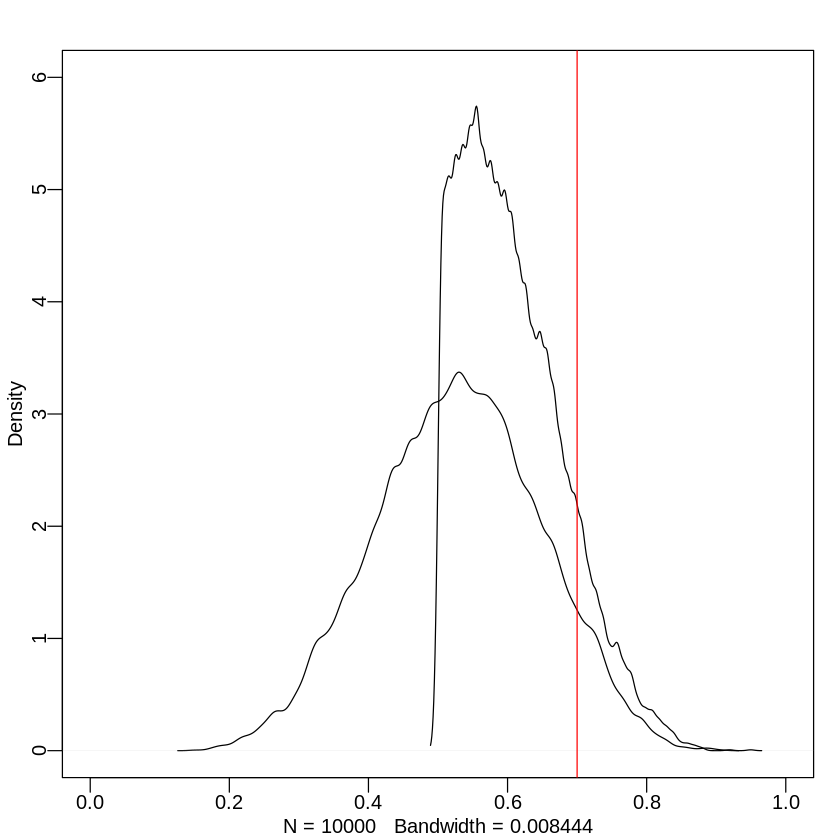

In [64]:
dens(samples.1, xlim=c(0, 1), ylim=c(0, 6))
dens(samples.2, xlim=c(0, 1), add=TRUE)
abline(v=.7, col='red')

# 3

In [ ]:
n_samples = 1000
p_grid <- seq(0, 1, length.out = n_samples)
prior <- c(rep(0, n_samples/2), rep(1, n_samples/2))
likelihood <- dbinom(8, 15, p=p_grid)

unstd.posterior <- likelihood * prior
posterior <- unstd.posterior / sum(unstd.posterior)

samples.3 <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
dens(samples.3, xlim=c(0, 1))
